### Modules declaration

In [11]:
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

### Functions declaration

In [10]:
def generate_deck():
    deck = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10] * 4
    return deck

In [8]:
def check_win(deposit, base_deposit, deck):
    check = False

    if deposit >= base_deposit * 2:
        check = True

    if deposit <= 0:
        check = True

    if len(deck) <= 12:
        check = True
    
    return check

In [9]:
def check_ace(deck, score):
    if score == 22:
        score -= 10
        deck[1] = 1
    return deck, score, True

In [7]:
def hit(cards, score, deck, extracted, ace):
    card = random.choice(deck)
    cards.append(card)
    extracted.append(card)
    score += card      
    deck.remove(card)
    
    if card == 11 and ace == True:
        cards[-1] = 1
        score -= 10
        
    return cards, score, deck, extracted

In [6]:
def probability(extracted, best_case):
    copy_deck = generate_deck()

    for card_extr in extracted:
        copy_deck.remove(card_extr)

    probability = []
    for best in best_case:
        counter = copy_deck.count(best)
        probability.append((counter / len(copy_deck)) * 100)

    return probability

In [5]:
def check_bust(score):
    if score >= 22:
        return True

    else:
        return False

In [4]:
def check_match(player_score, dealer_score, counter, deposit, bet, base_bet):
    if player_score > dealer_score:
        counter[0] += 1
        deposit += bet * 2
        bet = base_bet

    elif player_score < dealer_score:
        counter[1] += 1
        bet *= 2

    elif player_score == dealer_score:
        deposit += bet

    return counter, deposit, bet

In [3]:
def match(counter, base_deposit, base_bet):
    check = False
    deck = generate_deck()
    extracted = []
    deposit = base_deposit
    bet = base_bet

    while check == False:
        deposit -= bet

        player = []
        dealer = []
        player_score = 0
        dealer_score = 0
        p_ace = False
        d_ace = False

        for i in range(2):
            p_card = random.choice(deck)
            player.append(p_card)
            extracted.append(p_card)
            player_score += p_card            
            deck.remove(p_card)

            d_card = random.choice(deck)
            dealer.append(d_card)
            extracted.append(d_card)
            dealer_score += d_card
            deck.remove(d_card)

        player, player_score, p_ace = check_ace(player, player_score)
        dealer, dealer_score, d_ace = check_ace(dealer, dealer_score)
        
        if dealer_score == 21:
            counter[1] += 1
            bet *= 2
            
        else:
            while player_score < 11:
                player, player_score, deck, extracted = hit(player, player_score, deck, extracted, p_ace)

            best_case = []
            if player_score >= 11 and player_score < 20:
                for best in range(player_score, 20):
                    best_case.append(21 - best)
            
                if len(extracted) > 4: 
                    best_probability = probability(extracted[:3] + extracted[4:], best_case)

                elif len(extracted) == 4:
                    best_probability = probability(extracted[:3], best_case)
                
                audacity = random.randint(20,100)
                if max(best_probability) >= audacity:
                    player, player_score, deck, extracted = hit(player, player_score, deck, extracted, p_ace)

            if check_bust(player_score) == True:
                counter[1] += 1
                bet *= 2

            elif check_bust(player_score) == False:
                while dealer_score < 17:
                    dealer, dealer_score, deck, extracted = hit(dealer, dealer_score, deck, extracted, d_ace)

                if check_bust(dealer_score) == True:
                    counter[0] += 1
                    deposit += (bet * 2)
                    bet = base_bet

                elif check_bust(dealer_score) == False:
                    counter, deposit, bet = check_match(player_score, dealer_score, counter, deposit, bet, base_bet)
        
        check = check_win(deposit, base_deposit, deck)

    return counter

In [2]:
def bet1(counter, deposit, bet):
    counter = match(counter, deposit, bet)

    return counter

### Main

In [12]:
counter1 = [0] * 2

data1 = []
d = []

matches = 1000000

for deposit in range(100, 1001, 100):
    for x in tqdm(range(matches), ascii=True, desc=f"Matches with deposit = {deposit} in progress"):
        counter1 = bet1(counter1, deposit, 5)
    d.append(deposit)
    d.append(counter1[0])
    d.append(counter1[1])
    d.append((counter1[0]/(counter1[0]+counter1[1])*100))
    d.append((counter1[1]/(counter1[0]+counter1[1])*100))
    data1.append(d)
    d = []
    
    counter1 = [0] * 2

Matches with deposit = 1000 in progress: 100%|##########| 1000000/1000000 [00:59<00:00, 16907.48it/s]


In [13]:
p1 = pd.DataFrame(data1, columns=["Deposit","Player","Dealer","Player (%)","Dealer (%)"])
print(p1)

   Deposit   Player   Dealer  Player (%)  Dealer (%)
0      100  3324876  4230375   44.007486   55.992514
1      200  3394381  4325489   43.969406   56.030594
2      300  3396517  4323553   43.995935   56.004065
3      400  3423258  4358302   43.991924   56.008076
4      500  3420888  4360322   43.963445   56.036555
5      600  3422546  4359631   43.979288   56.020712
6      700  3430934  4370668   43.977301   56.022699
7      800  3432972  4368895   44.001929   55.998071
8      900  3428669  4371999   43.953531   56.046469
9     1000  3429550  4371201   43.964357   56.035643


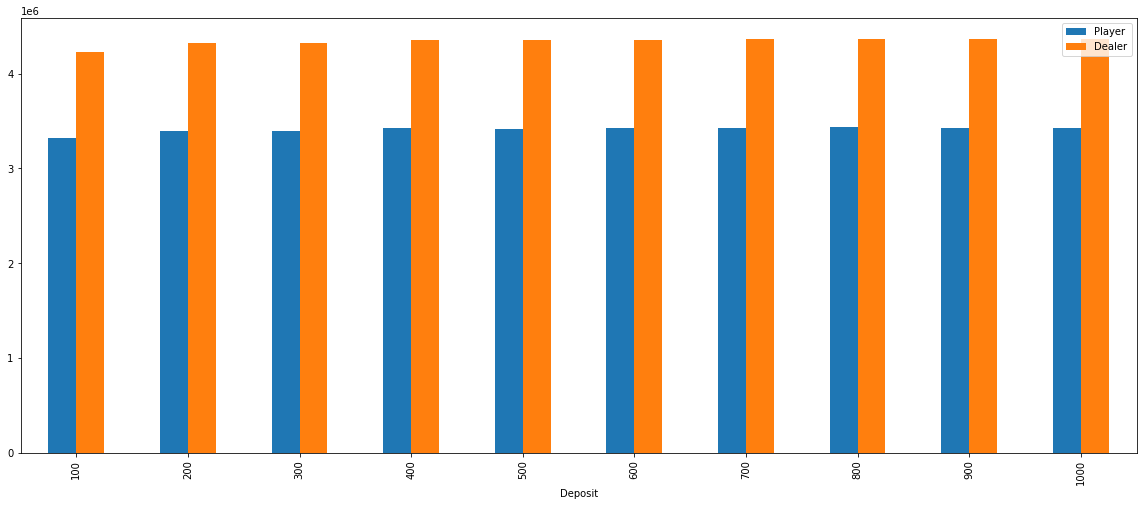

In [15]:
p1.plot(x="Deposit", y=["Player","Dealer"], kind="bar",figsize=(20,8))
plt.show()

### Alternative where deposit and bet change

In [17]:
counter2 = [0] * 2

data2 = []
d = []

matches = 10000     #per velocizzare l'esecuzione abbiamo ridotto il numero di partite

for deposit in range(100, 1001, 100):
    for bet in range(5, 26, 5):
        for x in tqdm(range(matches), ascii=True, desc=f"Matches with deposit = {deposit} and bet = {bet} in progress"):
            counter2 = bet1(counter2, deposit, bet)
        d.append(deposit)
        d.append(bet)
        d.append(counter2[0])
        d.append(counter2[1])
        d.append((counter2[0]/(counter2[0]+counter2[1])*100))
        d.append((counter2[1]/(counter2[0]+counter2[1])*100))
        data2.append(d)
        d = []
        
        counter2 = [0] * 2

Matches with deposit = 100 and bet = 5 in progress: 100%|##########| 10000/10000 [00:00<00:00, 17212.10it/s]
Matches with deposit = 100 and bet = 10 in progress: 100%|##########| 10000/10000 [00:00<00:00, 18670.09it/s]
Matches with deposit = 100 and bet = 15 in progress: 100%|##########| 10000/10000 [00:00<00:00, 19723.25it/s]
Matches with deposit = 100 and bet = 20 in progress: 100%|##########| 10000/10000 [00:00<00:00, 22321.49it/s]
Matches with deposit = 100 and bet = 25 in progress: 100%|##########| 10000/10000 [00:00<00:00, 24449.88it/s]
Matches with deposit = 200 and bet = 5 in progress: 100%|##########| 10000/10000 [00:00<00:00, 17211.66it/s]
Matches with deposit = 200 and bet = 10 in progress: 100%|##########| 10000/10000 [00:00<00:00, 17211.76it/s]
Matches with deposit = 200 and bet = 15 in progress: 100%|##########| 10000/10000 [00:00<00:00, 18248.23it/s]
Matches with deposit = 200 and bet = 20 in progress: 100%|##########| 10000/10000 [00:00<00:00, 18484.48it/s]
Matches with

In [22]:
p2 = pd.DataFrame(data2, columns=["Deposit","Bet","Player","Dealer","Player (%)","Dealer (%)"])
print(p2)

    Deposit  Bet  Player  Dealer  Player (%)  Dealer (%)
0       100    5   33227   42403   43.933624   56.066376
1       100   10   31564   39951   44.136195   55.863805
2       100   15   29528   37356   44.148077   55.851923
3       100   20   26679   34031   43.944984   56.055016
4       100   25   24777   31162   44.292890   55.707110
5       200    5   34028   43266   44.024116   55.975884
6       200   10   33551   42102   44.348539   55.651461
7       200   15   31403   40371   43.752612   56.247388
8       200   20   31243   40089   43.799417   56.200583
9       200   25   31642   39937   44.205703   55.794297
10      300    5   34009   43219   44.037137   55.962863
11      300   10   33240   42428   43.928741   56.071259
12      300   15   33292   42305   44.038785   55.961215
13      300   20   32164   40996   43.963915   56.036085
14      300   25   31566   40020   44.095214   55.904786
15      400    5   34525   43264   44.382882   55.617118
16      400   10   34010   4334

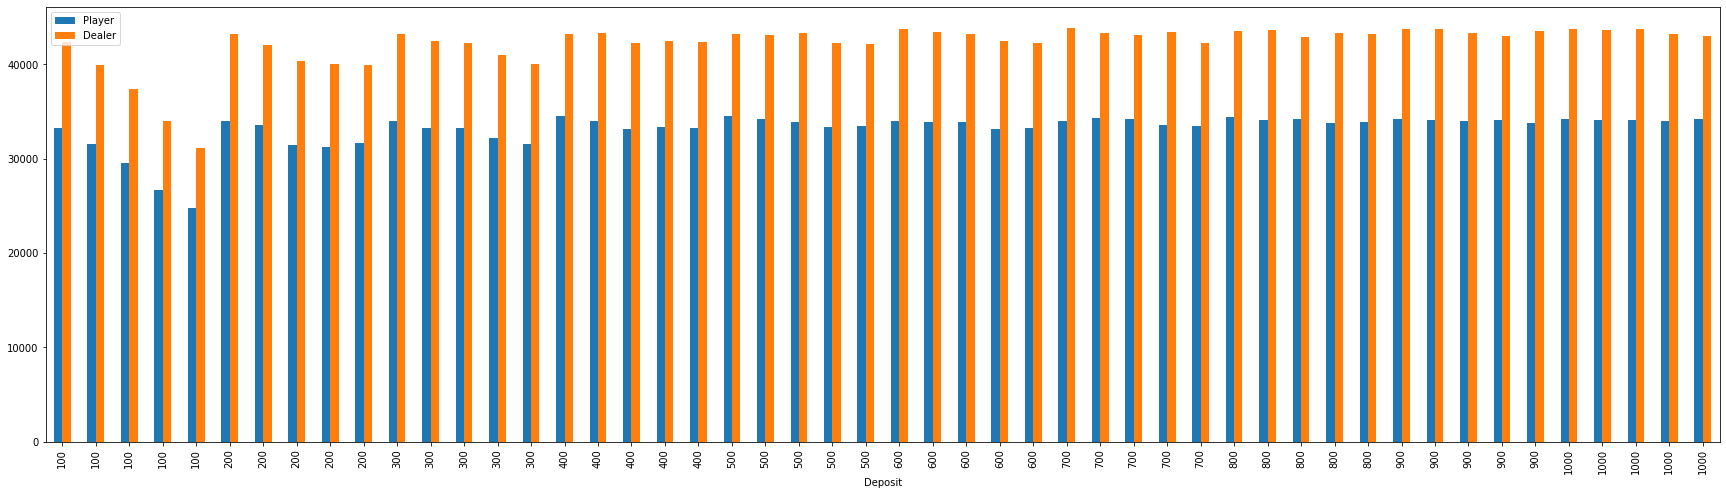

In [23]:
p2.plot(x="Deposit", y=["Player","Dealer"], kind="bar",figsize=(30,8))
plt.show()